In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.datasets 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from 

In [14]:
data=sklearn.datasets.load_breast_cancer()

In [15]:
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df['label']=data.target

In [20]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
df.shape

(569, 31)

## KDE plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


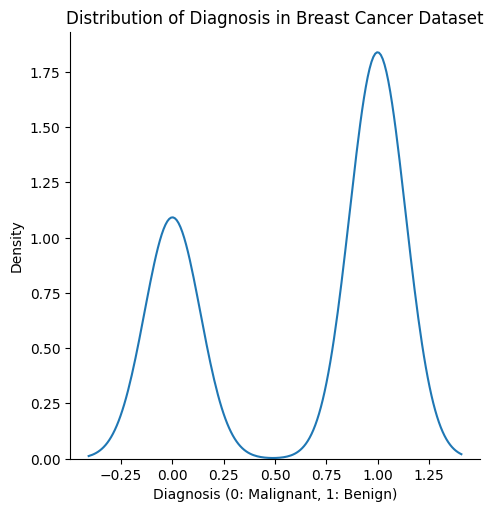

In [25]:
sns.displot(df["label"], kind="kde")  
plt.xlabel("Diagnosis (0: Malignant, 1: Benign)")
plt.title("Distribution of Diagnosis in Breast Cancer Dataset")
plt.show()



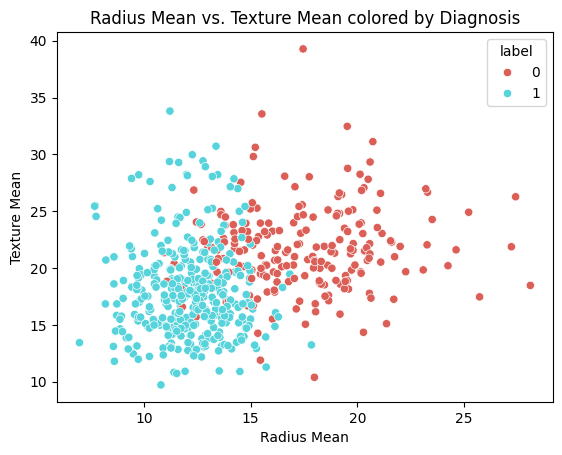

In [29]:
sns.scatterplot(
    x="mean radius", y="mean texture", hue="label", data=df, palette="hls"
)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Radius Mean vs. Texture Mean colored by Diagnosis")
plt.show()

In [30]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [31]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [33]:
X=df.drop('label',axis=1)
y=df.label

In [35]:
X.shape

(569, 30)

In [36]:
y.shape

(569,)

In [37]:
X=np.asarray(X)
y=np.asarray(y)

In [38]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## SVC model

In [42]:
from sklearn.svm import SVC
model=SVC()
#hyperparamaters
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [44]:
classifier=GridSearchCV(model,parameters,cv=5)
classifier.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [45]:
classifier.cv_results_

{'mean_fit_time': array([1.05161767e+00, 2.78329849e-03, 2.97932625e-03, 6.82301521e-03,
        2.17669945e+00, 2.73065567e-03, 2.72574425e-03, 6.24794960e-03,
        3.22938919e+00, 3.05614471e-03, 2.60548592e-03, 6.31461143e-03,
        5.19446082e+00, 3.37095261e-03, 2.72526741e-03, 6.34841919e-03]),
 'std_fit_time': array([4.19963443e-01, 1.60504903e-04, 5.35746017e-05, 1.40587445e-04,
        4.41739278e-01, 2.32930798e-04, 1.47927506e-04, 2.00583544e-04,
        8.16647253e-01, 7.70427200e-05, 6.19667087e-05, 3.22441172e-04,
        1.67777288e+00, 2.09411028e-04, 1.44800819e-04, 2.48898464e-04]),
 'mean_score_time': array([0.00134463, 0.00107121, 0.00180168, 0.00199041, 0.00105119,
        0.00093417, 0.00160861, 0.00176744, 0.00104485, 0.00091729,
        0.00147829, 0.00174308, 0.00104122, 0.0009428 , 0.00148654,
        0.00186729]),
 'std_score_time': array([4.76150958e-04, 9.16833988e-05, 3.13436203e-05, 6.06670305e-05,
        7.15427378e-05, 5.95836602e-06, 7.20423468e-

In [47]:
#best parameters
best_parameters=classifier.best_params_

In [49]:
best_parameters

{'C': 10, 'kernel': 'linear'}

In [51]:
#highest accuracy
classifier.best_score_

0.9525694767893185

loading these datas to a pandas dataframe

In [48]:
result=pd.DataFrame(classifier.cv_results_)

In [50]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.051618,0.419963,0.001345,0.000476,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.002783,0.000161,0.001071,0.000092,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.002979,0.000054,0.001802,0.000031,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.006823,0.000141,0.001990,0.000061,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.176699,0.441739,0.001051,0.000072,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
5,0.002731,0.000233,0.000934,0.000006,5,poly,"{'C': 5, 'kernel': 'poly'}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,6
6,0.002726,0.000148,0.001609,0.000072,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,5
7,0.006248,0.000201,0.001767,0.000009,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,14
8,3.229389,0.816647,0.001045,0.000089,10,linear,"{'C': 10, 'kernel': 'linear'}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
9,0.003056,0.000077,0.000917,0.000015,10,poly,"{'C': 10, 'kernel': 'poly'}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,8


In [52]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


## Randomized searchCV

In [54]:
# loading the SVC model
model = SVC()

In [55]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [56]:
# randomizedSearch search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [58]:
# fitting the data to our model
classifier.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [59]:
classifier.cv_results_

{'mean_fit_time': array([1.03538694e+00, 6.47072792e-03, 6.61039352e-03, 3.19247141e+00,
        2.13240752e+00, 2.64062881e-03, 3.11727524e-03, 6.18157387e-03,
        2.66618729e-03, 2.57973671e-03]),
 'std_fit_time': array([4.13951218e-01, 1.94898309e-04, 1.49303113e-04, 8.06880525e-01,
        4.23781586e-01, 3.56493103e-05, 8.34808824e-05, 2.59659773e-04,
        1.30067979e-04, 8.84927292e-05]),
 'mean_score_time': array([0.00109301, 0.00183067, 0.00190382, 0.00113082, 0.00103354,
        0.00150585, 0.00088291, 0.00173993, 0.00157619, 0.00095282]),
 'std_score_time': array([7.20866134e-05, 4.69709047e-05, 3.44094759e-05, 6.81164843e-05,
        8.61808469e-05, 4.31710151e-05, 1.21199212e-05, 1.53163480e-05,
        6.88954617e-05, 6.77478045e-06]),
 'param_kernel': masked_array(data=['linear', 'sigmoid', 'sigmoid', 'linear', 'linear',
                    'rbf', 'poly', 'sigmoid', 'rbf', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
        

In [60]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [61]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [62]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [63]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.035387,0.413951,0.001093,0.000072,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,3
1,0.006471,0.000195,0.001831,0.000047,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,9
2,0.006610,0.000149,0.001904,0.000034,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,8
3,3.192471,0.806881,0.001131,0.000068,linear,10,"{'kernel': 'linear', 'C': 10}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
4,2.132408,0.423782,0.001034,0.000086,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [64]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]

In [65]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,5,sigmoid,0.411178
2,1,sigmoid,0.460441
3,10,linear,0.952569
4,5,linear,0.950815
5,10,rbf,0.922714
6,20,poly,0.919221
7,10,sigmoid,0.402391
8,5,rbf,0.931501
9,1,poly,0.908663
